# Programming Assignment \# 1

__Goal:__ 

This programming assignment will ask you to do the following tasks.

(a) Implement some of the sorting algorithms for sorting integer data in ascending order in python3.
  - Simple sort 
  - Bubble Sort
  - Merge Sort
  - Quicksort 
  
  
(b) Your implementation must count the number of *compare* operations each sorting algorithm carries out.
    
(c) You must formulate a series of arrays of lengths from $5$ to $100$  (step by 5), that will form the worst case of these
sorting algorithms and plot the number of comparisons in the __worst case__ vs. size of input array (x axis)
 
(d) Generate $1000$ random inputs for each size and compute average time. Plot the size of input array (x axis) vs. number of comparisons (y axis)

----
## Simple Sort

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def simple_sort(a):
    # must sort the array a in place and return the number of comparisons
    num_compare = 0
    n = len(a)
    for i in range(0, n): # i goes from 0 to n-1
        for j in range(i+1, n): # j goes from i+1 to n-1
            num_compare = num_compare + 1
            if a[i] >= a[j]:
                # swap
                a[i], a[j] = a[j], a[i]
    return num_compare

In [2]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = simple_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity analysis of simple sort.

Simple Sort consists of two loops, and regardless of the input array, the first loop runs n steps. The second loop runs $n-i-1$ steps where $i$ is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$

The code below plots comparisons for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

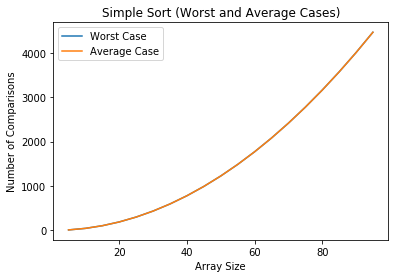

In [3]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = simple_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = simple_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Simple Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----

### Bubble Sort

In [4]:
# this function traverses the array n−1 times, comparing every element to the one after it 
# swaps them if the value on the left is larger than value in the right
# returns the total number of comparisons made

def bubble_sort(a):
    num_compares = 0
    for index in range(len(a)-1,0,-1):
        for i in range(index):
            num_compares = num_compares + 1
            if a[i]>a[i+1]:
                temp = a[i]
                a[i] = a[i+1]
                a[i+1] = temp

    return num_compares

### Complexity Analysis of Bubble Sort

The best case complexity for Bubble Sort is $\Theta(n)$, which occurs when the array of size n is already sorted, thus no swaps take place and only 1 iteration of the array is needed. However, this is only one scenario among many; the average case complexity of bubble sort is actually $\Theta(n^{2})$.

The worst case complexity is also $\Theta(n^{2})$, which occurs if the array is sorted  in descending order. In this case, there is a first iteration of n elements, followed by another of n - 1 elements, down to the last element left to compare. 
This translates into n + (n - 1) + (n - 2) ... + 1 = $\frac{n*(n + 1)}{2}$ = $\Theta(n^{2})$.

Thus, Bubble Sort has equal asymptotic average case and worst case complexities (the difference between them is only a constant factor). 

The function *bubble_burst* below was created to generate the worst case input, an array sorted in reverse order.

The graph reflects that we cannot really distinguish between the number of comparisons for average vs. worst case.

In [82]:
# WC FUNCTION DEMO

def bubble_burst(a_size):
    a = []
    for i in range(a_size,0,-1):
        a.append(i)
    
    return a

print(bubble_burst(10))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


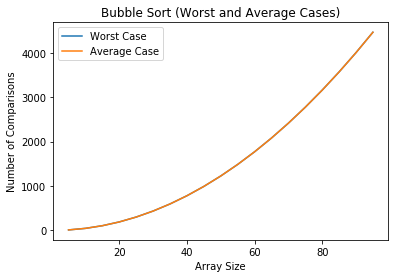

In [5]:
array_sizes = range(5, 100, 5)

# CODE TO GENERATE WORST CASE - array in descending order
def bubble_burst(a_size):
    a = []
    for i in range(a_size,0,-1):
        a.append(i)
    
    return a

# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = bubble_burst(n)
    nc = bubble_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = bubble_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Bubble Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Merge Sort

In [29]:
# this function receives an array and recursively splits it in half until it has length 1
# then compares the values of the subarrays and copies them in order into a new array
# it only returns the number of value comparisons made

def merge_sort_recursive(a, num_compares):
    
    if len(a) > 1:
        mid = len(a) // 2
        left = a[:mid]
        right = a[mid:]

        num_compares = merge_sort_recursive(left, num_compares)
        num_compares = merge_sort_recursive(right, num_compares)

        i = 0
        j = 0
        k = 0
        
        while i < len(left) and j < len(right):
            num_compares = num_compares + 1
            if left[i] < right[j]:
                a[k] = left[i]
                i = i + 1
            else:
                a[k] = right[j]
                j = j + 1
            k = k + 1

        while i < len(left):
            num_compares = num_compares + 1
            a[k] = left[i]
            i = i + 1
            k = k + 1

        while j < len(right):
            num_compares = num_compares + 1
            a[k] = right[j]
            j = j + 1
            k = k + 1
        
    return num_compares

In [30]:
# main mergesort function. receives an array, calls merge_sort_recursive and passes the array and initial count of comparisons
# returns the number of comparisons made

def merge_sort(a):
    
    num_compares = 0
    
    return merge_sort_recursive(a, num_compares)

### Complexity Analysis of Merge Sort

The average and worst case complexity of Merge Sort for an input of size n is given by the recurrence T(n) = 2 * T($\frac{n}{2}$) + $\Theta(n)$, which can be solved as $\Theta(n log n)$. The supporting operations in the split and merge steps occur in $\Theta(n)$, and halving the arrays at every iteration gives us $\Theta(log n)$. 

The worst case complexity can be reached with an input where all numbers are out of order with the one that should immediately follow it, and they are placed on opposite halves of the array. This results in the maximum number of comparisons as it will take reaching the base case to compare elements that must lie adjacent to one another.

The function *alternate* below was created to generate the worst case input. As shown below, however, we cannot really distinguish between the number of comparisons for average vs. worst case.

In [81]:
# WC FUNCTION DEMO

# create a sorted array, grab the evens put them into one array, grab the odds put them in another
# append one to the other. odds first to make sure pairs are out of order
def alternate(a_size):
    
    init_array = []
    for i in range(0, a_size):
        init_array.append(i)

    odds = []
    for j in range(1, len(init_array),+2):
        odds.append(j)
    
    evens = []
    for m in range(0, len(init_array),+2):
        evens.append(m)

    for f in evens:
        odds.append(f)

    return odds

print(alternate(10))

[1, 3, 5, 7, 9, 0, 2, 4, 6, 8]


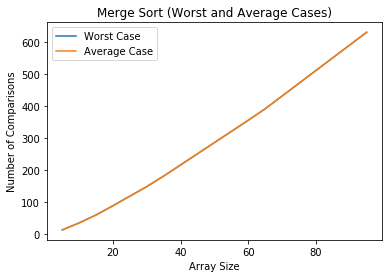

In [72]:
array_sizes = range(5, 100, 5)

# create a sorted array, grab the evens put them into one array, grab the odds put them in another
# append one to the other. odds first to make sure pairs are out of order
def alternate(a_size):
    
    init_array = []
    for i in range(0, a_size):
        init_array.append(i)

    odds = []
    for j in range(1, len(init_array),+2):
        odds.append(j)
    
    evens = []
    for m in range(0, len(init_array),+2):
        evens.append(m)

    for f in evens:
        odds.append(f)

    return odds


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = alternate(n)
    nc = merge_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = merge_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Merge Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Quick Sort


In [4]:
# partition function splits the array using the index passed on to it as "first" as the pivot, 
# first index after the pivot as "left", and "last" as the right index
# returns the right index of last iteration and the number of comparisons made
# right index will be used to "split" the array once more in recursive calls

def partition(a, first, last, num_compares):

    pivot = a[first]
    left = first+1
    right = last

    done = False
    while not done:

        while left <= right and a[left] <= pivot:
            num_compares = num_compares + 1
            left = left + 1

        while a[right] >= pivot and right >= left:
            num_compares = num_compares + 1
            right = right -1

        if right < left:
            done = True
            
        else:
            temp = a[left]
            a[left] = a[right]
            a[right] = temp

    temp = a[first]
    a[first] = a[right]
    a[right] = temp

    return right, num_compares

In [9]:
# helper function receives an array, left and right indices 
# recursively "splits" the array, using the partition function
# returns the number of comparisons made within the partition function

def quick_sort_helper(a, first, last, num_compares):
    if first < last:

        split, num_compares = partition(a, first, last, num_compares)

        num_compares =+ quick_sort_helper(a, first, split-1, num_compares) 
        
        num_compares =+ quick_sort_helper(a, split+1, last, num_compares)
    
    return num_compares

In [10]:
# main quicksort function, sorts an array in-place 
# receives an array, calls quick_sort_helper, returns number of comparisons made

def quick_sort(a):
    
    num_compares = 0
    
    return quick_sort_helper(a, 0, len(a)-1, num_compares)

### Complexity Analysis of Quick Sort

Given an array of size n of distinct elements, the average complexity of Quicksort with a good choice of pivot is given by the recurrence T(n) = 2 * T($\frac{n}{2}$) + $\Theta(n)$, which can be solved as $\Theta(n log n)$.

The worst case complexity for mergesort is given by T(n) = T(n-1) + $\Theta({n})$, solved as $\Theta(n^{2})$. Reaching this WC will depend on the implementation. The way that a quicksort algorithm selects the pivot affects the kind of inputs that will yield the worst case running time (this is not an exhaustive list of ways that a pivot can be picked, just some examples to illustrate the effect of pivot choice):

1. If the pivot is always assigned to the first or last element in the array: an input of numbers sorted in descending order will lead to a fully unbalanced partitioning, and the largest number of comparisons possible;
2. If the pivot is assigned in a random fashion, because we have the same probability of picking any element in the array as the pivot, this will equal the average case complexity;
3. If the pivot is chosen using a median of medians strategy, we are guaranteed to maintain approximately a 2:1 ratio on each side of the pivot, so this is the safest strategy to avoid worst case running time.

Finally, regardless of the choice of pivot, an array of numbers that have equal values will also hit WC complexity; since all values are the same, each recursive call will lead to unbalanced partitioning.

The function *descending* is used below to generate a worst case input for my implementation where the pivot is always chosen as the first item: an array sorted in reverse order. Below it, I also included the function *same_all* to generate an array with all elements of equal value to test out this scenario.

### Worst Case using array in descending order

In [11]:
# WC FUNCTION DEMO

def descending(a_size):
    a = []
    for i in range(a_size,0,-1):
        a.append(i)
        
    return a

print(descending(10))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


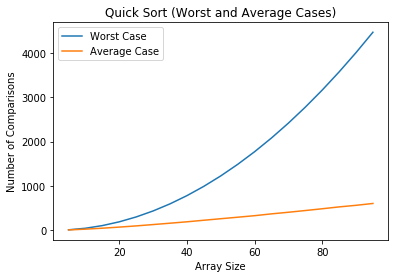

In [12]:
array_sizes = range(5, 100, 5)

# CODE TO GENERATE WORST CASE - array in descending order
def descending(a_size):
    a = []
    for i in range(a_size,0,-1):
        a.append(i)
        
    return a

# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = descending(n)
    nc = quick_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = quick_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
    
# Code for plotting
plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Quick Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

### Worst Case using array of all equal elements

In [13]:
# WC FUNCTION DEMO

def same_all(a_size):
    
    # generate random value
    value = 0
    for x in range(1):
          value = random.randint(0,9)
    
    # add copies of value to fill the length of a_size
    a = []
    for i in range(a_size,0,-1):
        a.append(value)
    
    return a

print(same_all(10))

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


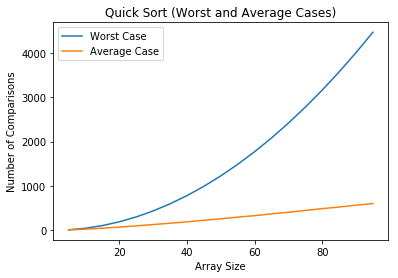

In [14]:
array_sizes = range(5, 100, 5)

# CODE TO GENERATE WORST CASE - all elements equal value
def same_all(a_size):
    
    # generate random value
    value = 0
    for x in range(1):
          value = random.randint(0,9)
    
    # add copies of value to fill the length of a_size
    a = []
    for i in range(a_size,0,-1):
        a.append(value)
    
    return a

# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = same_all(n)
    nc = quick_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = quick_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Quick Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

-----
## Testing Code: Do not edit



In [13]:
def test_sorting_algorithm(sort_fun, sz, num_trials):
    num_passed = 0
    for i in range(num_trials):
        a = create_random_shuffled_array(sz)
        a_orig = list(a) # make a copy
        b = sorted(a)
        nc = sort_fun(a)
        if a == b:
            num_passed = num_passed + 1
        else:
            print('----')
            print('FAILED: Input = ', a_orig)
            print('Expected: ', b)
            print('Obtained:', a)
            print('----')
    print('Num Trials = ', num_trials)
    print('Num Passed = ', num_passed)

In [27]:
test_sorting_algorithm(simple_sort, 50, 100)

Num Trials =  100
Num Passed =  100


In [43]:
test_sorting_algorithm(bubble_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [44]:
test_sorting_algorithm(merge_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [45]:
test_sorting_algorithm(quick_sort, 10, 10)

Num Trials =  10
Num Passed =  10
